# Rain in Australia: Using meteorlogical data to predict Rainfall

By Sharatt Seenivasan, Deepali Nagwade, Aniruddha Redij, and Harsh Mangukiya


# Introduction

Rainfall is a significant meteorological event that can affect local agriculture, transportation, water control, and more. It may be even more consequential for areas that experience relatively less rainfall than the rest of the world, such as cities and towns in Australia. The ability to accurately forecast rainfall could provide useful information to local government and industry, especially in a world feeling the effects of climate change.  

The study will enable us to predict whether or not a location in Australia will experience rain tomorrow using the weather observation data. Given a set of features, we want to predict the target variable RainTomorrow as, 1 which shows either it will rain the next day or 0 which shows it will not rain the next day. 


## Technology/Datasets

For this study, we utilized the following Python libraries and datasets.

*   [Pandas](https://pandas.pydata.org/docs/)
*   [Requests](https://requests.readthedocs.io/en/latest/)
*   [Seaborn](https://seaborn.pydata.org/)
*   [Matplotlib](https://matplotlib.org/)
*   [Scikit-learn](https://scikit-learn.org/stable/)
*   [Warnings](https://docs.python.org/3/library/warnings.html)
*   [SciPy](https://scipy.org/)
*   [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)









# Dataset Description
The dataset has 23 features with 145460 observations. The features in the dataset are as follows:
* Date: The date of observation.
* Location: The location of the weather station where the observation was recorded.
* MinTemp: The minimum temperature in degrees celsius.
* MaxTemp: The maximum temperature in degrees celsius.
* rainfall: The amount of rainfall recorded for the day in mm.
* Evaporation: The pan evaporation (mm) in the 24 hours to 9am.
* Sunshine: The number of hours of bright sunshine in the day.
* WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight.
* WindGustSpeed: Speed (km/h) of the strongest wind gust in the 24 hours to midnight.
* WindDir9am: Direction of the wind at 9am.
* WindDir3pm: Direction of the wind at 3pm.
* WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am.
* WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm.
* Humidity9am: Humidity (percent) at 9am.
* Humidity3pm: Humidity (percent) at 3pm.
* Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am.
* Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm.
* Cloud9am: Fraction of sky obscured by cloud at 9am.
* Cloud3pm: TFraction of sky obscured by cloud (in "oktas": eighths) at 3pm.
* Temp9am: Temperature (degrees C) at 9am.
* Temp3pm: Temperature (degrees C) at 3pm.
* RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.
* RainTomorrow: Yes if the rain for that day was 1mm or more, otherwise No.

##Importing libaries

Before we can begin, we'll first have to import all the required modules to our Jupyter Notebook environment. 

In [ ]:
import numpy as np
import pandas as pd

import requests

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Loading Data

We'll need to load the dataset into a Pandas dataframe. To ease access, we've uploaded the weatherAUS.csv file to GitHub. Thus, allowing us to easily convert the CSV to a Pandas dataframe via the `read_csv` method. 

In [ ]:
#read the rainfall dataset into the env using pandas
url = "https://raw.githubusercontent.com/Sharatt-Seenivasan/CS513FinalProject/main/weatherAUS.csv"
rainfall_data = pd.read_csv(url,encoding = "utf8")


# Data Exploration

With the Rain in Australia dataset loaded into our environment, we can now explore it using Pandas. Through this data exploration, we can discover key characteristics about our dataset that can later be used to help clean our data and train our models. 

In [ ]:
rainfall_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
rainfall_data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

### Dataset dimensions

In [ ]:
#outputs the shape of the data: 
rainfall_data.shape

(145460, 23)

There are 145460 observations and 23 variables in the dataset. 

### Dataset columns

In [ ]:
#outputs the name of all the columns
list(rainfall_data.columns)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
#numerical columns
print(list(rainfall_data.select_dtypes(include=[np.number]).columns))
print(len(list(rainfall_data.select_dtypes(include=[np.number]).columns)))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
16


In [ ]:
print(list(rainfall_data.select_dtypes(exclude=[np.number])))
print(len(list(rainfall_data.select_dtypes(exclude=[np.number]))))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
7


The dataset has 16 quantitative variables and 7 categorical  variables.

In [ ]:
#output the dtypes for each column
rainfall_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Dataset summary

In [ ]:
#prints a concise summary of our dataframe
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Only Date and Location have 145460 non-null values, which means that the other variables have entries with null values. 

### Null values in dataset

In [ ]:
#Shows how many null values are in each column
null_data = rainfall_data.isnull().sum().to_frame(name="# of null values")
null_data['% null'] = (rainfall_data.isnull().sum())/rainfall_data.shape[0]
null_data

# of null values    % null
Date                          0  0.000000
Location                      0  0.000000
MinTemp                    1485  0.010209
MaxTemp                    1261  0.008669
Rainfall                   3261  0.022419
Evaporation               62790  0.431665
Sunshine                  69835  0.480098
WindGustDir               10326  0.070989
WindGustSpeed             10263  0.070555
WindDir9am                10566  0.072639
WindDir3pm                 4228  0.029066
WindSpeed9am               1767  0.012148
WindSpeed3pm               3062  0.021050
Humidity9am                2654  0.018246
Humidity3pm                4507  0.030984
Pressure9am               15065  0.103568
Pressure3pm               15028  0.103314
Cloud9am                  55888  0.384216
Cloud3pm                  59358  0.408071
Temp9am                    1767  0.012148
Temp3pm                    3609  0.024811
RainToday                  3261  0.022419
RainTomorrow               3267  0.022460

While most variables have under 10% of their data as null, the following variables have over 35% of their entries as null values:


*   Evaporation - 0.431665
*   Sunshine - 0.480098
*   Cloud9am - 0.384216
*   Cloud3pm - 0.408071



### Descriptive statistics of dataset

In [ ]:
rainfall_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

For following variables, there is a significant difference between the 75 percentile and the max value:

*   Rainfall
*   Evaporation
*   WindGustSpeed
*   WindSpeem9am
*   WindSpeed3pm 

This indicates the presence of outliers in the data. 

In addition, the table shows that range varies greatly from one variable to another. 



In [ ]:
rainfall_data.describe(include=['object'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

Modes:
* Date - 2013-11-12
* Location - Canberra
* WindGustDir - W
* WindDir9am - N
* WindDir3pm - SE
* RainToday - No
* RainTomorrow - No

Other observations:
* Date and Location have a large amount of unique values.
* RainToday and RainTomorrow only have two unique values (Yes or No). 
* The dataset is imbalanced with  75.83% of RainTommorrow having the value of `No`. 


### Frequency of Rain Tomorrow

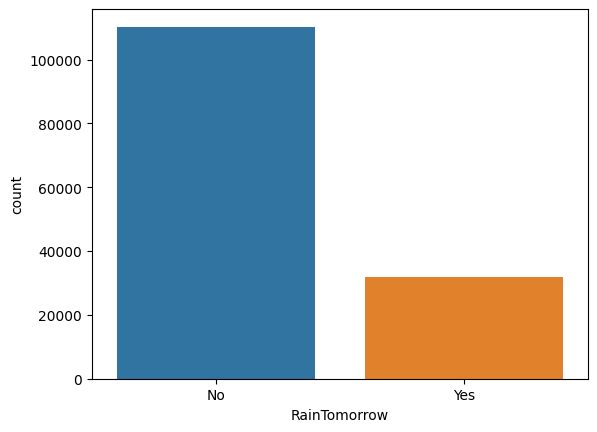

In [ ]:
sns.countplot(x="RainTomorrow", data=rainfall_data)
plt.show()

The above bar plot visualizes the imbalance between the number of entries with RainTomorrow as `No` and the number of entries with RainTomorrow as `Yes`. 

In [ ]:
#We can map RainToday and RainTomorrow to binary values
rainfall_data['RainTomorrow']=rainfall_data['RainTomorrow'].map({'Yes':1,'No':0})
rainfall_data['RainToday']=rainfall_data['RainToday'].map({'Yes':1,'No':0})

### RainTomorrow Frequency Across Locations

<Figure size 2000x1000 with 0 Axes>

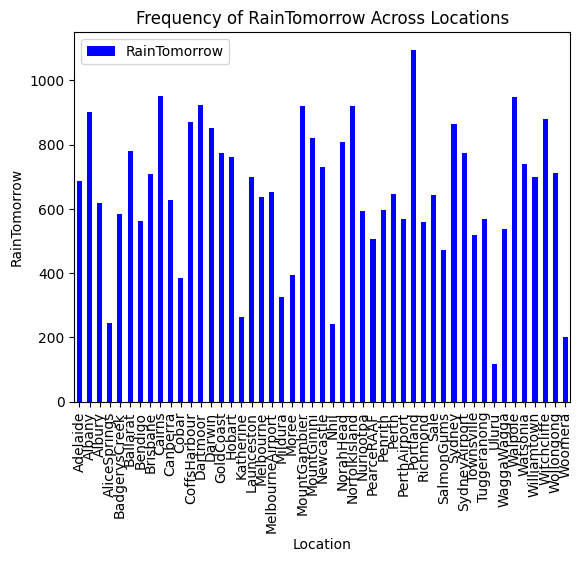

In [ ]:
plt.figure(figsize=(20, 10))
groupby_location = rainfall_data.groupby('Location').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')
# groupby_location = rainfall_data.groupby(['Location', 'RainTomorrow']).size().reset_index(name='count')
# pivot_table = groupby_location.pivot(index='Location', columns='RainTomorrow', values='count')
# pivot_table.plot(kind='bar',width=0.9)
plt.title('Frequency of RainTomorrow Across Locations')
plt.xlabel('Location')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()


Uluru has the lowest frequency and Portland has the highest frequency. 

### RainTomorrow Frequency per Year


In [ ]:
#convert date to datetime type
rainfall_data['Date']= pd.to_datetime(rainfall_data['Date'])

#create Year and Month columns
rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month

#drop date
rainfall_data = rainfall_data.drop('Date',axis=1)

<Figure size 2000x1000 with 0 Axes>

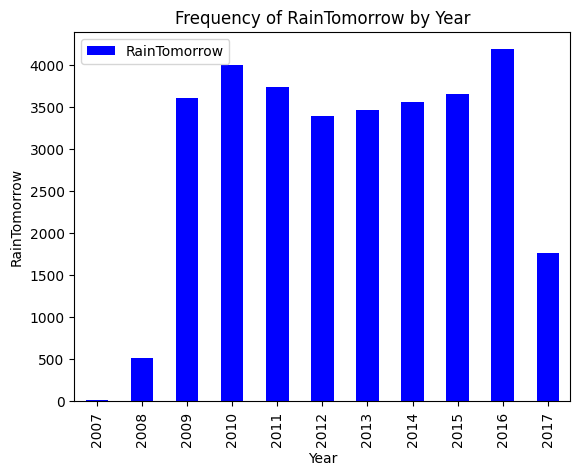

In [ ]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('Year').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by Year')
plt.xlabel('Year')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()


2007 has the lowest frequency and 2016 had the highest frequency. 


### RainTomorrow Frequency per Month

<Figure size 2000x1000 with 0 Axes>

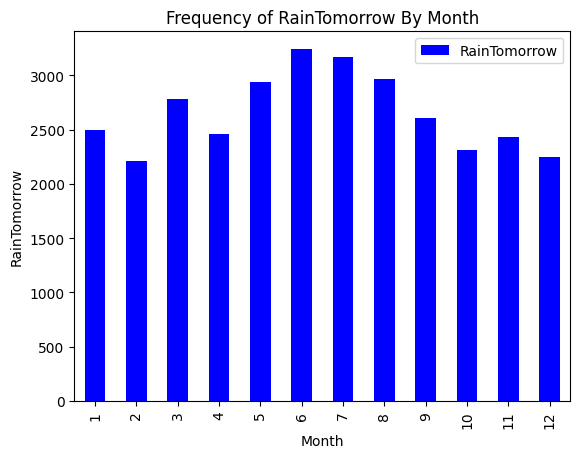

In [ ]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('Month').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow By Month')
plt.xlabel('Month')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

February has the lowest frequency and June had the highest frequency. 

### Frequency of RainTomorrow by WindGustDir

<Figure size 2000x1000 with 0 Axes>

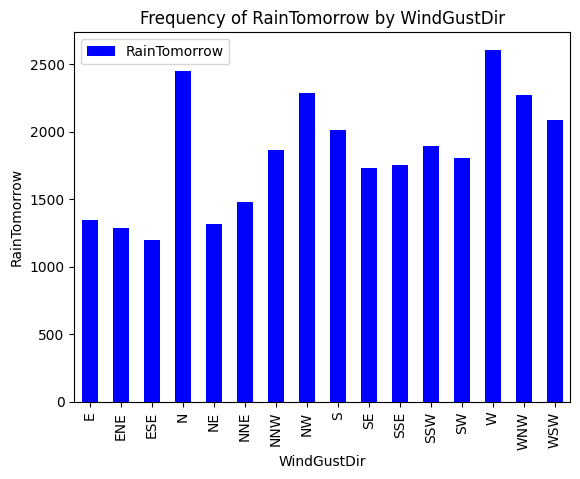

In [ ]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindGustDir').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

### Frequency of RainTomorrow by WindDir9am

<Figure size 2000x1000 with 0 Axes>

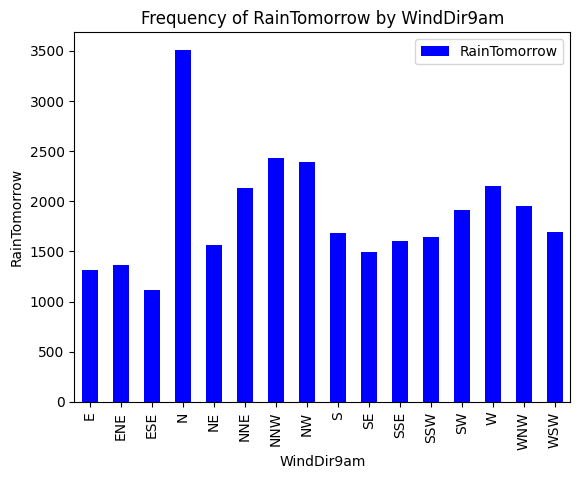

In [ ]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindDir9am').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindDir9am')
plt.xlabel('WindDir9am')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

### Frequency of RainTomorrow by WindDir3pm

<Figure size 2000x1000 with 0 Axes>

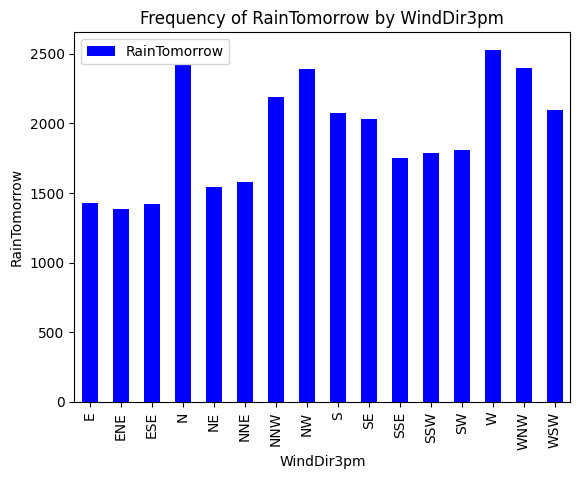

In [ ]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindDir3pm').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindDir3pm')
plt.xlabel('WindDir3pm')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

### Chi-Squared Tests

In [ ]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Location"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Location.")
else:
    print("There is no relationship between RainTomorrow and Location.")

Location      Adelaide  Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  \
RainTomorrow                                                                    
0.0               2402    2114    2393          2787           2345      2247   
1.0                688     902     618           244            583       781   

Location      Bendigo  Brisbane  Cairns  Canberra  ...  Townsville  \
RainTomorrow                                       ...               
0.0              2472      2452    2038      2789  ...        2514   
1.0               562       709     950       629  ...         519   

Location      Tuggeranong  Uluru  WaggaWagga  Walpole  Watsonia  Williamtown  \
RainTomorrow                                                                   
0.0                  2430   1405        2440     1870      2261         1853   
1.0                   568    116         536      949       738          700   

Location      Witchcliffe  Wollongong  Woomera  
RainTomorrow                                    
0.0                  2073        2270     2788  
1.0                   879         713      202  

[2 rows x 49 columns]

There is a relationship between RainTomorrow and Location.


In [ ]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Year"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Year.")
else:
    print("There is no relationship between RainTomorrow and Year.")

Year          2007  2008   2009   2010   2011   2012   2013   2014   2015  \
RainTomorrow                                                                
0.0             42  1735  12988  12422  11388  11655  12632  13843  13583   
1.0             19   511   3607   3997   3738   3389   3465   3557   3648   

Year           2016  2017  
RainTomorrow               
0.0           13325  6703  
1.0            4183  1763

There is a relationship between RainTomorrow and Year.


In [ ]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Month"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Month.")
else:
    print("There is no relationship between RainTomorrow and Month.")

Month            1     2      3     4      5     6     7     8     9     10  \
RainTomorrow                                                                  
0.0           10423  8318  10255  8843  10114  9145  8608  8792  8739  9494   
1.0            2498  2207   2781  2463   2941  3244  3171  2970  2606  2310   

Month           11    12  
RainTomorrow              
0.0           9025  8560  
1.0           2436  2250

There is a relationship between RainTomorrow and Month.


In [ ]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["WindDir9am"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and WindGustDir9am.")
else:
    print("There is no  relationship between RainTomorrow and WindGustDir9am.")

WindDir9am       E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE  \
RainTomorrow                                                               
0.0           7709  6370  6440  7883  5959  5811  5410  6163  6812  7671   
1.0           1315  1365  1118  3510  1568  2137  2430  2389  1681  1491   

WindDir9am     SSE   SSW    SW     W   WNW   WSW  
RainTomorrow                                      
0.0           7365  5803  6328  6103  5246  5151  
1.0           1601  1645  1909  2157  1948  1692

There is a relationship between RainTomorrow and WindGustDir9am.


In [ ]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["WindDir3pm"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and WindDir3pm.")
else:
    print("There is no relationship between RainTomorrow and WindDir3pm.")

WindDir3pm       E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE  \
RainTomorrow                                                               
0.0           6913  6342  6961  6246  6623  4867  5547  6075  7523  8632   
1.0           1429  1382  1421  2421  1541  1577  2186  2393  2075  2031   

WindDir3pm     SSE   SSW    SW     W   WNW   WSW  
RainTomorrow                                      
0.0           7392  6221  7374  7383  6256  7236  
1.0           1750  1789  1808  2528  2400  2093

There is a relationship between RainTomorrow and WindDir3pm.


### Histograms of numerical variables

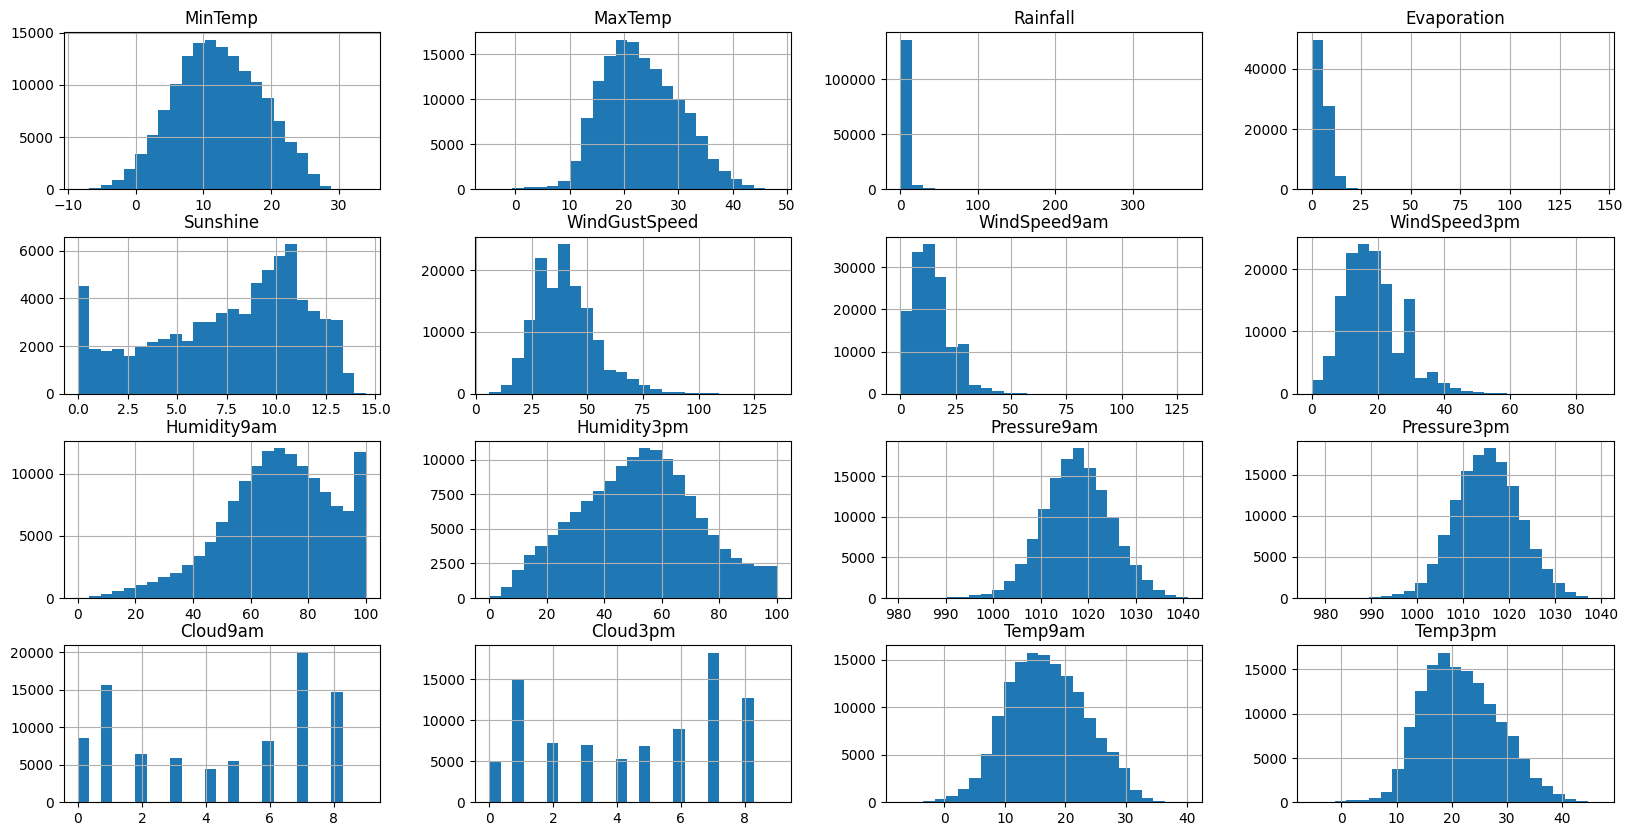

In [ ]:
column_names = list(rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month', 'RainToday','RainTomorrow'],axis=1).columns)
ax_count = 0
rainfall_data.hist(column = column_names, figsize=(20, 10), bins=25)  
plt.show() 

Using histograms, we can better visualize the distribution of our variables. 

MinTemp, MaxTemp, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm have approximately normal distributions.

However, some variables have skewed distribution. 

WindGustSpeed, WindSpeed9am, and Windspeed3pm are all skewed to the right. Rainfall and Evaporation are heavily skewed right. 

Sunshine and Humidity are both skewed to the left. 

Cloud9am and Cloud3pm appear to have a bimodal distribution.

### Boxplots of numerical variables

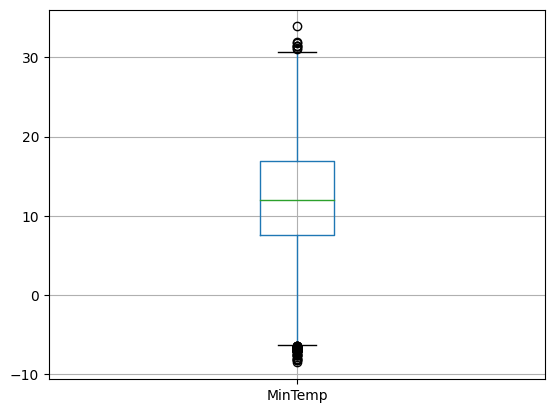

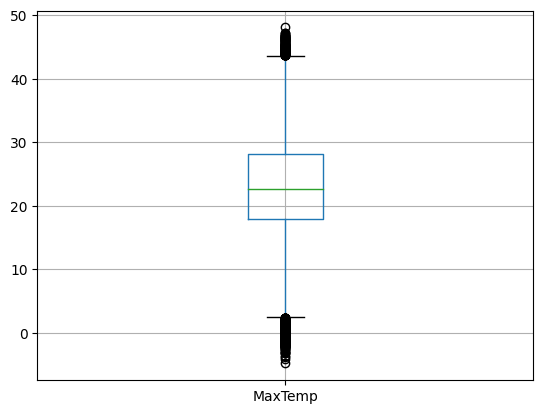

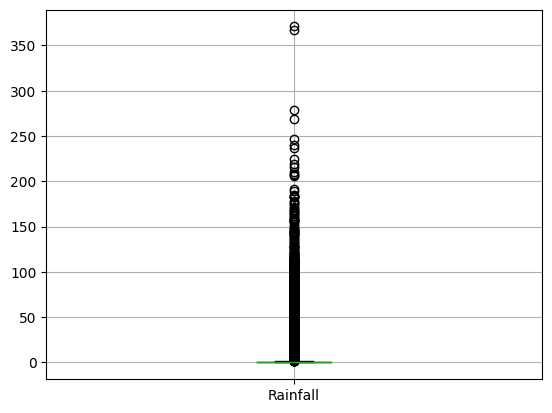

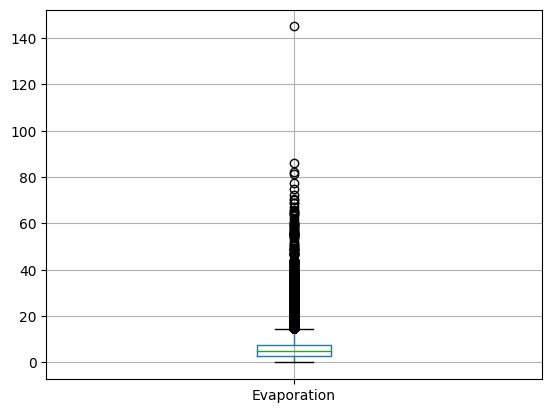

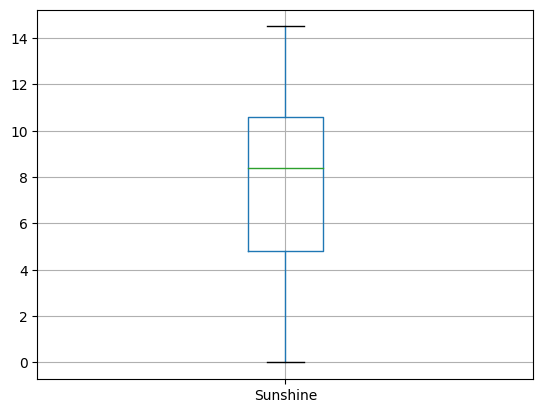

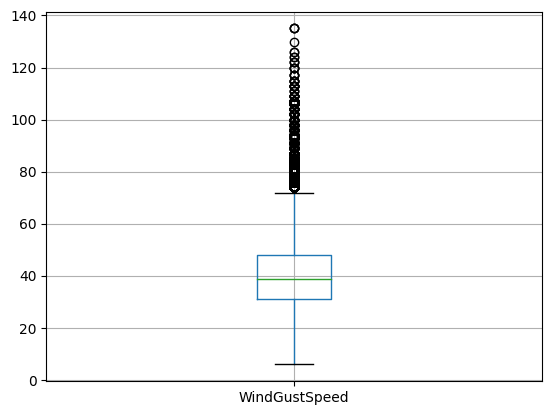

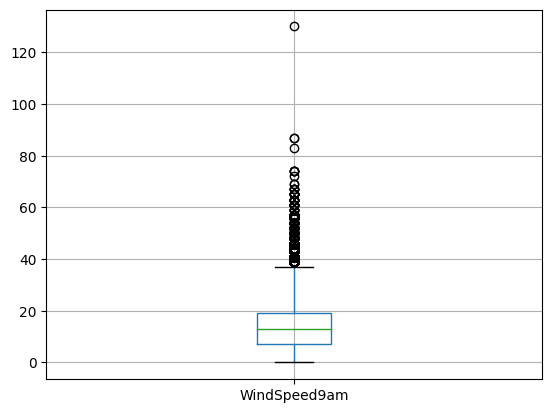

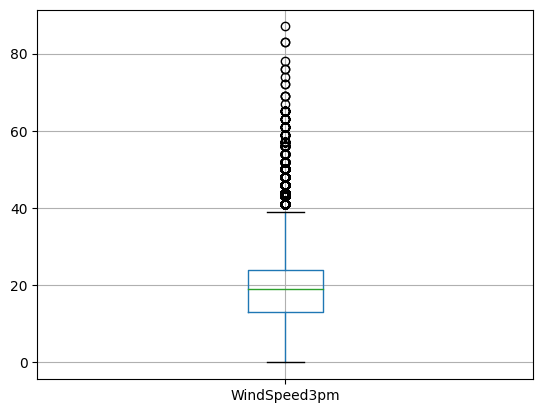

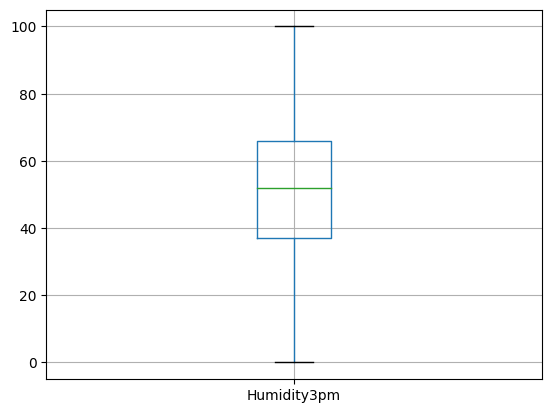

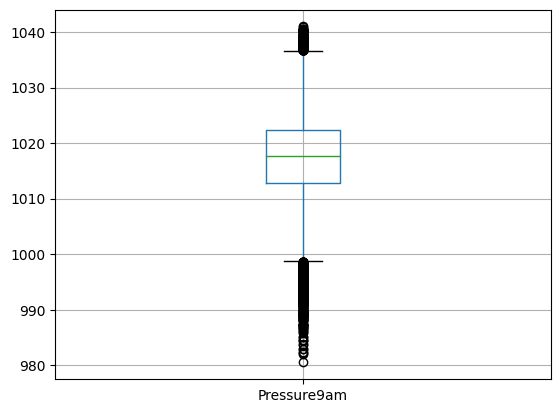

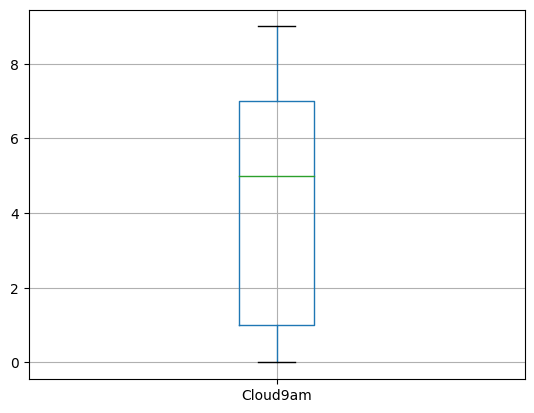

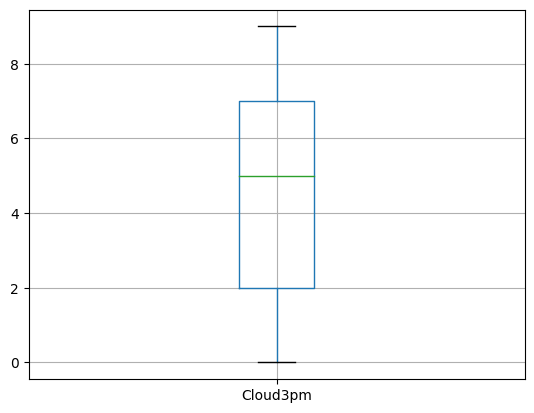

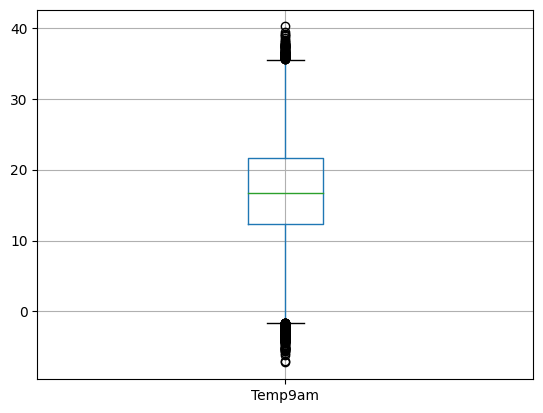

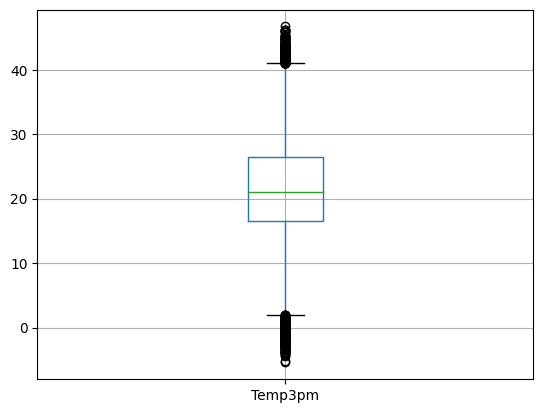

In [ ]:
for name in column_names:
  plt.figure()
  rainfall_data.boxplot(column=name,figsize=(5,5))


The boxplots show that several variables are heavily influenced by outliers. 

### Correlation between numerical variables

In [ ]:
rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   
RainToday      0.055836 -0.229192  0.501516    -0.186945 -0.330522   
RainTomorrow   0.083936 -0.159237  0.239032    -0.119285 -0.450768   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   
RainToday           0.155761      0.103057      0.080591     0.353708   
RainTomorrow        0.234010      0.090995      0.087817     0.257161   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   
RainT

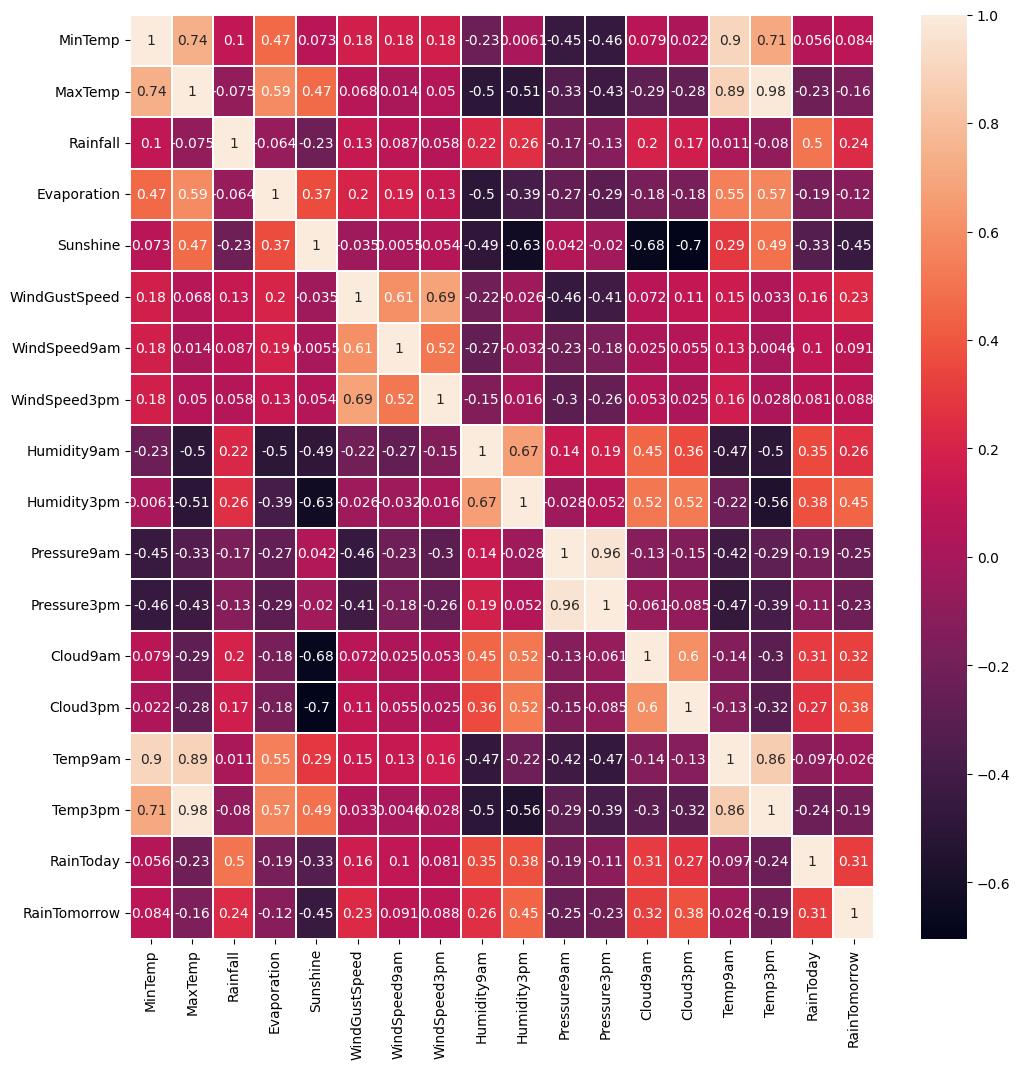

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr(),annot=True,linewidths=0.2,ax=ax);

In [ ]:
#print out correlation coefficients 
corr_matrix = rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr()
corr_series = corr_matrix.unstack()

print("Strong Positive Correlation")
strong_positive_pairs = corr_series[(corr_series >= 0.70) & (corr_series != 1)]
print(strong_positive_pairs)

print("Strong Negative Correlation")
strong_negative_pairs = corr_series[(corr_series <= -0.70)]
print(strong_negative_pairs)



Strong Positive Correlation
MinTemp      MaxTemp        0.736555
             Temp9am        0.901821
             Temp3pm        0.708906
MaxTemp      MinTemp        0.736555
             Temp9am        0.887210
             Temp3pm        0.984503
Pressure9am  Pressure3pm    0.961326
Pressure3pm  Pressure9am    0.961326
Temp9am      MinTemp        0.901821
             MaxTemp        0.887210
             Temp3pm        0.860591
Temp3pm      MinTemp        0.708906
             MaxTemp        0.984503
             Temp9am        0.860591
dtype: float64
Strong Negative Correlation
Sunshine  Cloud3pm   -0.70393
Cloud3pm  Sunshine   -0.70393
dtype: float64


The following variables have a strong relationship with each other:
* MinTemp, MaxTemp (r = 0.736555)
* MinTemp, Temp9am (r = 0.901821)
* MinTemp, Temp3pm (r = 0.708906)
* MaxTemp, Temp9am (r = 0.887210)
* MaxTemp, Temp3pm (r = 0.984503)
* Sunshine, Cloud3pm (r = -0.70393)
* Pressure9am, Pressure3pm (r = 0.961326)
* Temp9am, Temp3pm (r = 0.860591)

As a result, it may be necessary to exclude these variables when training models to prevent overfitting and data redundancy. 

### Pair plot of strongly correlated variables

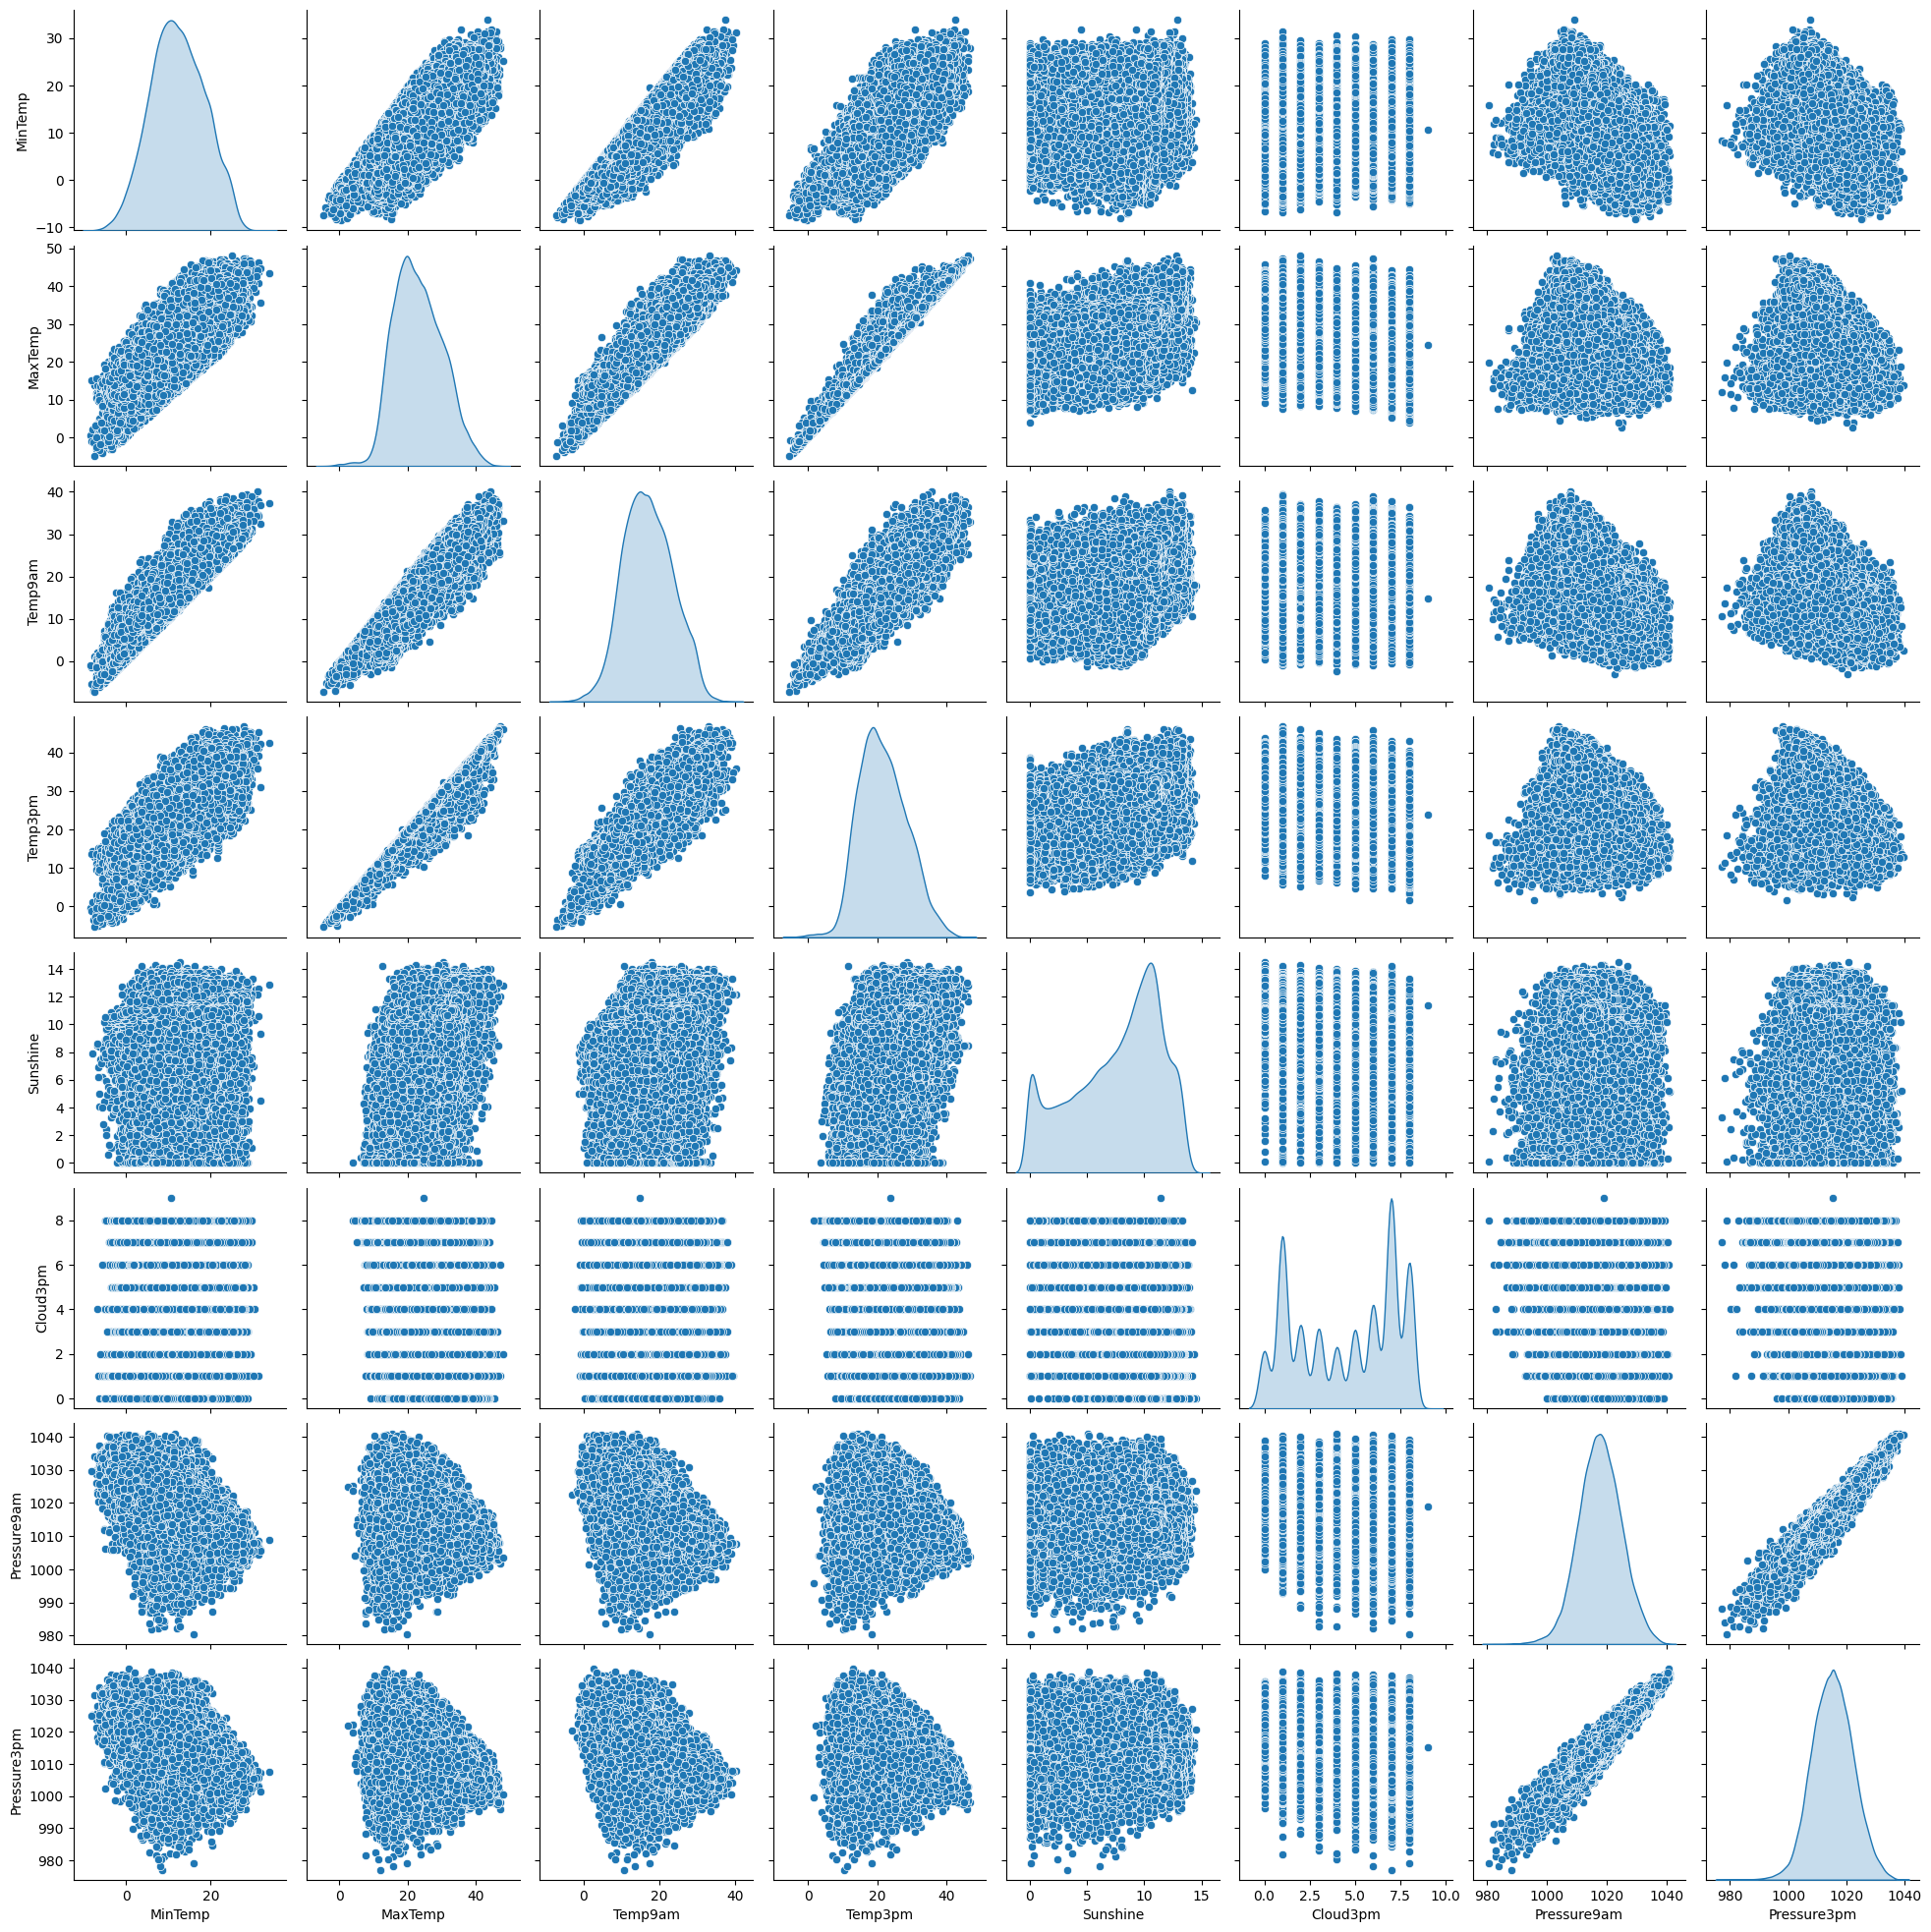

In [ ]:
strongly_corr_vars = ['MinTemp','MaxTemp','Temp9am','Temp3pm','Sunshine','Cloud3pm','Pressure9am','Pressure3pm']
sns.pairplot(rainfall_data[strongly_corr_vars], kind='scatter', diag_kind='kde', palette='Rainbow')
plt.show()

# Data Cleaning


Using the observations made during data exploration, the Rain in Australia dataset must now be cleaned so it can be used for training. 

### Handling missing data

Only a small percentage of the entries for `RainTommorrow` are null, so all the missing values for `RainTommorow` are simply dropped from the dataset.

In [ ]:
rainfall_data = rainfall_data.dropna(subset=['RainTomorrow'])

`RainToday` has a weak relationship with the target variable `RainTomorrow` and only a small percentage of entries for `RainToday` are null. As a result, the null values for `RainToday` can be dropped without causing a significant impact to the performance of our model. 
 

In [ ]:
rainfall_data = rainfall_data.dropna(subset=['RainToday'])

In a similar vein, `MinTemp`, `MaxTemp`, `Rainfall`, `Temp9am`,`Temp3pm` all have a weak correlation to `RainTomorrow` as well as a small % of missing values. 

In [ ]:
rainfall_data = rainfall_data.dropna(subset=['MinTemp'])
rainfall_data = rainfall_data.dropna(subset=['MaxTemp'])
rainfall_data = rainfall_data.dropna(subset=['Rainfall'])
rainfall_data = rainfall_data.dropna(subset=['Temp9am'])
rainfall_data = rainfall_data.dropna(subset=['Temp3pm'])

We can deal with the null values in the remaining categorical variables by replacing NA values with the mode of the variable. 

In [ ]:
for colname in ['WindGustDir','WindDir9am','WindDir3pm']:
  rainfall_data[colname]=rainfall_data[colname].fillna(rainfall_data[colname].mode()[0])

Will we have to use the other two measures of central tendency to handle the missing values in the numerical variables. For the variables with a normal distribution, we can replace the NA values with the mean. For the variables with non-normal distributions, we can use the median instead. 



In [ ]:
normal_col_names = ['Humidity3pm','Pressure9am','Pressure3pm']
skewed_col_names = ['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Cloud9am','Cloud3pm']

#replace NA values with mean or median. 
rainfall_data[normal_col_names]=rainfall_data[normal_col_names].fillna(rainfall_data[normal_col_names].mean())
rainfall_data[skewed_col_names]=rainfall_data[skewed_col_names].fillna(rainfall_data[skewed_col_names].median())

In [ ]:
null_data = rainfall_data.isnull().sum().to_frame(name="# of null values")
null_data['% null'] = (rainfall_data.isnull().sum())/rainfall_data.shape[0]
null_data

# of null values  % null
Location                      0     0.0
MinTemp                       0     0.0
MaxTemp                       0     0.0
Rainfall                      0     0.0
Evaporation                   0     0.0
Sunshine                      0     0.0
WindGustDir                   0     0.0
WindGustSpeed                 0     0.0
WindDir9am                    0     0.0
WindDir3pm                    0     0.0
WindSpeed9am                  0     0.0
WindSpeed3pm                  0     0.0
Humidity9am                   0     0.0
Humidity3pm                   0     0.0
Pressure9am                   0     0.0
Pressure3pm                   0     0.0
Cloud9am                      0     0.0
Cloud3pm                      0     0.0
Temp9am                       0     0.0
Temp3pm                       0     0.0
RainToday                     0     0.0
RainTomorrow                  0     0.0
Year                          0     0.0
Month                         0     0.0

Now, we longer have any null values in our data!

### Converting Categorical Variables to Numerical Variables

The remaining categorical variables will have to be converted to numerical variables so we can feed the data into different machine learning models. Since all of the values for our remaining categorical variables are non-ordinal, we'll use one-hot encoding to create additional features based on the number of unique values in each categorical variable. 

In [ ]:
#Use one-hot encoding to convert all the categorical variables to numerical data that can be used by all models
rainfall_data=pd.get_dummies(rainfall_data)

### Data Normalization

Now that we've converted our entire dataset to numerical features, we're confronted with another problem: the ranges of some of our features vary greatly from the ranges of other features. This attribute can be especially problematic for some machine learning models such as kNN, since it results in some features being given much greater weight than other regardless how important they actually are. We can handle this issue in our dataset by using Min-Max Normalization to make sure all the values in our dataset lie between 0 and 1. 

In [ ]:
for colname in list(rainfall_data.columns):
  rainfall_data[colname] = (rainfall_data[colname] - rainfall_data[colname].min())/(rainfall_data[colname].max() - rainfall_data[colname].min())

### Removing Highly Correlated Variables 

The variables with a strong relationship with training features are dropped to help prevent overfitting and data redundancy.

In [ ]:
rainfall_data = rainfall_data.drop(['MinTemp','MaxTemp','Temp9am','Pressure9am','Cloud3pm'], axis=1)

### Splitting data into Training and Test

In [ ]:
#Split data into training and test 
train,test = train_test_split(rainfall_data,random_state= 1, test_size=0.3, shuffle=True)

### Apply SMOTE to the Training set

We can use SMOTE (Synthetic Minority Over-sampling Technique) to help deal with the imbalance of our data. The issue with traditional oversampling and undersampling is that we may unintentionally decrease the truthfullness of the data since the same data points are being used multiple times. However with SMOTE, we generate synthetic data points for the minority class by interpolating between the existing data points. This helps improve the generalization capabilitites of our models and reduce overfitting. 

In addition, SMOTE is only applied to the training set (not the test set) in order to maintain the original class distribution and ensure that the performance metrics that we obtain are valid. 

In [ ]:
def smote_oversample(df, target_col):
   X = df.drop(columns=[target_col]).values
   y = df[target_col].values

   smote = SMOTE()
   X_resampled, y_resampled = smote.fit_resample(X, y)

   df_resampled = pd.DataFrame(X_resampled, columns=df.drop(columns=[target_col]).columns)
   df_resampled[target_col] = y_resampled
   
   return df_resampled

In [ ]:
train =    (train,'RainTomorrow')

#Model Training and Testing

## Logistic Regression

In [ ]:
# Train logistic regression classifier
lr = LogisticRegression()
lr.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on testing set
lr_predictions = lr.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
lr_accuracy = accuracy_score(test['RainTomorrow'], lr_predictions)
lr_confusion = confusion_matrix(test['RainTomorrow'], lr_predictions)
lr_report = classification_report(test['RainTomorrow'], lr_predictions)
lr_precision = precision_score(test['RainTomorrow'], lr_predictions)
lr_recall = recall_score(test['RainTomorrow'], lr_predictions)
lr_f1_score = f1_score(test['RainTomorrow'], lr_predictions)
lr_roc_auc = roc_auc_score(test['RainTomorrow'], lr_predictions)

In [ ]:
lr_predictions

array([1., 1., 0., ..., 1., 1., 0.])

In [ ]:
print(lr_predictions.shape)

(41243,)


In [ ]:
df=test
df['predictions_lr']=lr_predictions

In [ ]:
print(test.drop('RainTomorrow',axis=1))

        Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
17079   0.017251     0.033103  0.586207       0.255814      0.000000   
118812  0.000000     0.051034  0.000000       0.286822      0.218391   
139603  0.000000     0.035862  0.724138       0.209302      0.126437   
18550   0.000000     0.033103  0.586207       0.457364      0.402299   
25799   0.000000     0.033103  0.586207       0.170543      0.068966   
...          ...          ...       ...            ...           ...   
98615   0.023720     0.033103  0.586207       0.341085      0.172414   
18740   0.000000     0.033103  0.586207       0.139535      0.172414   
38274   0.000000     0.077241  0.275862       0.441860      0.321839   
85336   0.009164     0.034483  0.179310       0.124031      0.080460   
89366   0.000539     0.059310  0.820690       0.186047      0.103448   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  ...  \
17079       0.103448         0.96         0.71      0.611

In [ ]:
df.head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
17079   0.017251     0.033103  0.586207       0.255814      0.000000   
118812  0.000000     0.051034  0.000000       0.286822      0.218391   
139603  0.000000     0.035862  0.724138       0.209302      0.126437   
18550   0.000000     0.033103  0.586207       0.457364      0.402299   
25799   0.000000     0.033103  0.586207       0.170543      0.068966   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  ...  \
17079       0.103448         0.96         0.71      0.61104  0.444444  ...   
118812      0.298851         0.21         0.51      0.53920  0.888889  ...   
139603      0.252874         0.68         0.47      0.48160  0.444444  ...   
18550       0.402299         0.64         0.59      0.91040  0.555556  ...   
25799       0.103448         0.33         0.14      0.61104  0.555556  ...   

        WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
17079             0.0           0.0            1.0             0.0   
118812            1.0           0.0            0.0             0.0   
139603            0.0           0.0            0.0             0.0   
18550             0.0           0.0            0.0             1.0   
25799             0.0           0.0            0.0             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
17079              0.0            0.0           0.0             0.0   
118812             0.0            0.0           0.0             0.0   
139603             0.0            0.0           0.0             0.0   
18550              0.0            0.0           0.0             0.0   
25799              0.0            0.0           0.0             0.0   

        WindDir3pm_WSW  predictions_lr  
17079              0.0             1.0  
118812             0.0             1.0  
139603             0.0             0.0  
18550              0.0             0.0  
25799              0.0             0.0  

[5 rows x 113 columns]

In [ ]:
df.columns.tolist()

['Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Ric

In [ ]:
[x for x in list(df.columns.values.tolist()) if x=="Location"]
df.to_csv("newfile.csv")

In [ ]:
# Print performance metrics
print("Accuracy:")
print(lr_accuracy)
print()

print("Confusion Matrix:")
print(lr_confusion)
print()

print("Classification Report:")
print(lr_report)
print()

print("Precision Score:")
print(lr_precision)
print()

print("Recall Score:")
print(lr_recall)
print()

print("F1 Score:")
print(lr_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(lr_roc_auc)
print()

Accuracy:
0.7990204398322139

Confusion Matrix:
[[26018  6224]
 [ 2065  6936]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86     32242
         1.0       0.53      0.77      0.63      9001

    accuracy                           0.80     41243
   macro avg       0.73      0.79      0.74     41243
weighted avg       0.84      0.80      0.81     41243


Precision Score:
0.5270516717325228

Recall Score:
0.7705810465503833

F1 Score:
0.6259645322864491

Area Under the ROC Curve (AUC-ROC):
0.788770456281829



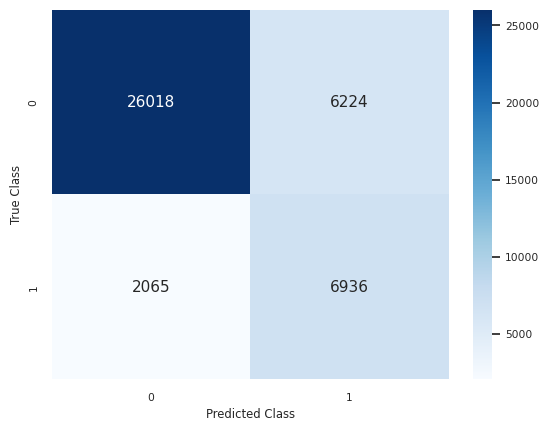

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(lr_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

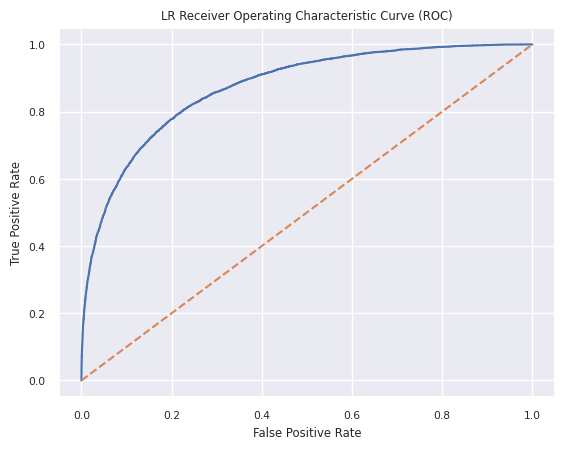

In [ ]:
# Plot the ROC curve
probs = lr.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Receiver Operating Characteristic Curve (ROC)')
plt.show()

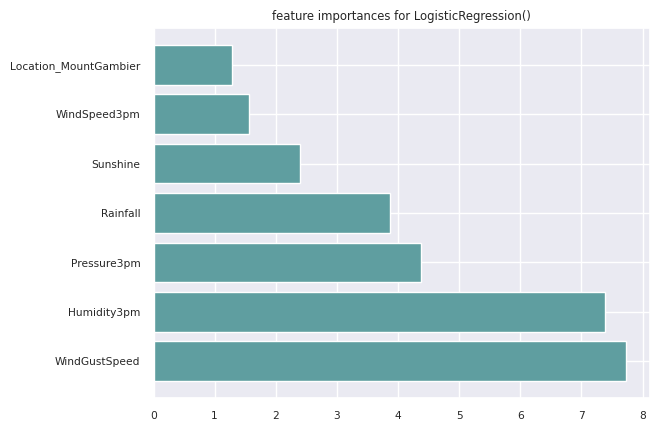

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(lr))
    plt.show()

# Specifying top n features to visualize
f_importances(abs(lr.coef_[0]), features_names, top=7)


## K-Nearest-Neighbors

In [ ]:
# Train the KNN model (k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
knn_predictions = knn_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
knn_accuracy = knn_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
knn_confusion = confusion_matrix(test['RainTomorrow'], knn_predictions)
knn_report = classification_report(test['RainTomorrow'], knn_predictions)
knn_precision = precision_score(test['RainTomorrow'], knn_predictions)
knn_recall = recall_score(test['RainTomorrow'], knn_predictions)
knn_f1_score = f1_score(test['RainTomorrow'], knn_predictions)
knn_roc_auc = roc_auc_score(test['RainTomorrow'], knn_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(knn_accuracy)
print()

print("Confusion Matrix:")
print(knn_confusion)
print()

print("Classification Report:")
print(knn_report)
print()

print("Precision Score:")
print(knn_precision)
print()

print("Recall Score:")
print(knn_recall)
print()

print("F1 Score:")
print(knn_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(knn_roc_auc)
print()

Accuracy:
0.6851344470576826

Confusion Matrix:
[[22538  9704]
 [ 3282  5719]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.78     32242
         1.0       0.37      0.64      0.47      9001

    accuracy                           0.69     41243
   macro avg       0.62      0.67      0.62     41243
weighted avg       0.76      0.69      0.71     41243


Precision Score:
0.3708098294754587

Recall Score:
0.6353738473502945

F1 Score:
0.46830985915492956

Area Under the ROC Curve (AUC-ROC):
0.6671999811777835



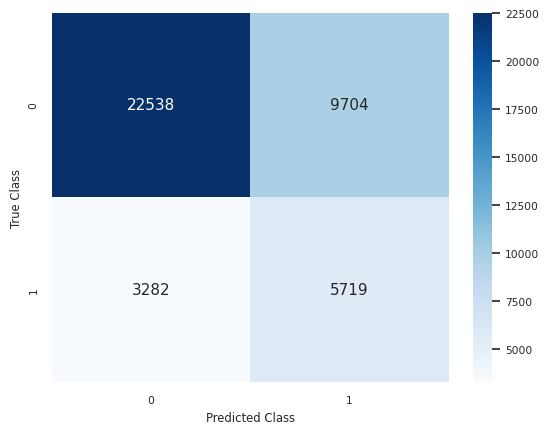

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(knn_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

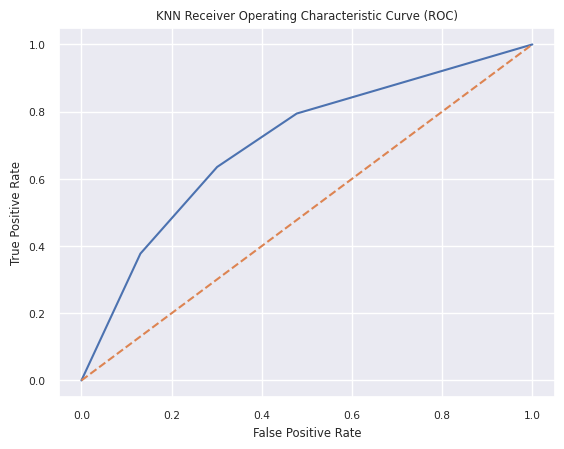

In [ ]:
# Plot the ROC curve
probs = knn_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic Curve (ROC)')
plt.show()

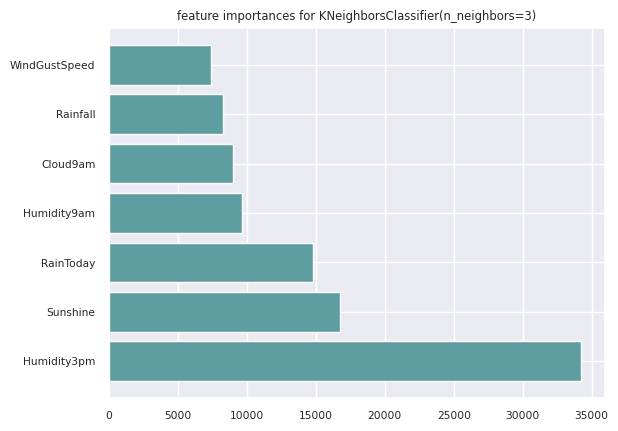

In [ ]:
# Separate the target variable from the rest of the data
X = rainfall_data.drop('RainTomorrow', axis=1)
y = rainfall_data['RainTomorrow']

# Select the top 7 features using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=7)
selector.fit(X, y)

# Get the names of the top features
feature_names = X.columns[selector.get_support()]

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(knn_model))
    plt.show()

# Plot the feature importances
f_importances(selector.scores_[selector.get_support()], feature_names)

## Decision Tree

In [ ]:
# Train the decision tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
dt_predictions = tree_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
dt_accuracy = tree_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
dt_confusion = confusion_matrix(test['RainTomorrow'], dt_predictions)
dt_report = classification_report(test['RainTomorrow'], dt_predictions)
dt_precision = precision_score(test['RainTomorrow'], dt_predictions)
dt_recall = recall_score(test['RainTomorrow'], dt_predictions)
dt_f1_score = f1_score(test['RainTomorrow'], dt_predictions)
dt_roc_auc = roc_auc_score(test['RainTomorrow'], dt_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(dt_accuracy)
print()

print("Confusion Matrix:")
print(dt_confusion)
print()

print("Classification Report:")
print(dt_report)
print()

print("Precision Score:")
print(dt_precision)
print()

print("Recall Score:")
print(dt_recall)
print()

print("F1 Score:")
print(dt_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(dt_roc_auc)
print()

Accuracy:
0.804572897218922

Confusion Matrix:
[[27219  5023]
 [ 3037  5964]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     32242
         1.0       0.54      0.66      0.60      9001

    accuracy                           0.80     41243
   macro avg       0.72      0.75      0.73     41243
weighted avg       0.82      0.80      0.81     41243


Precision Score:
0.5428233366706107

Recall Score:
0.6625930452171981

F1 Score:
0.5967580548328997

Area Under the ROC Curve (AUC-ROC):
0.7534012307532552



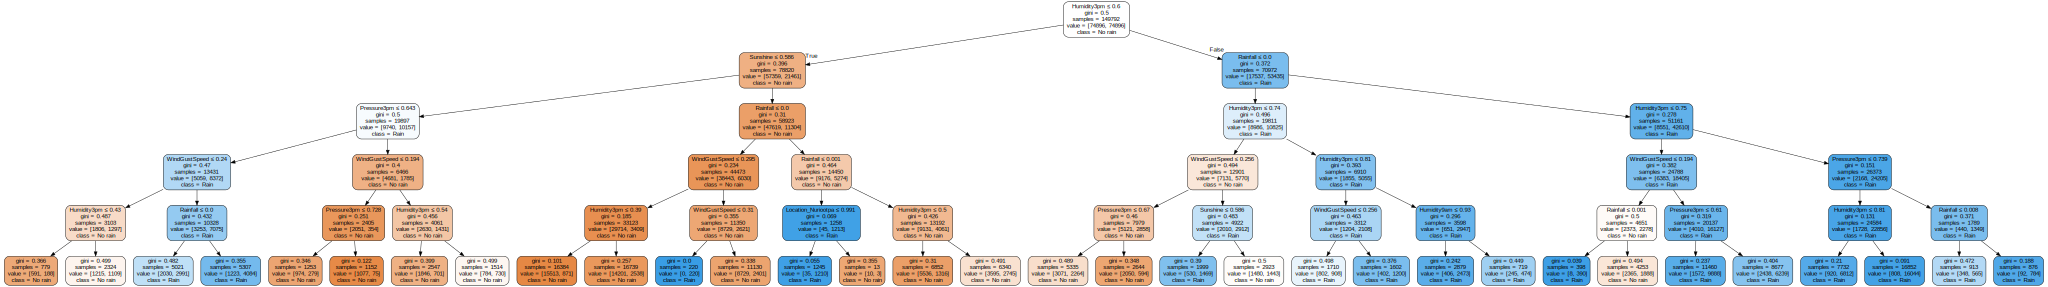

In [ ]:
# Generate a visualization of the decision tree
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=train.drop('RainTomorrow', axis=1).columns,
                           class_names=['No rain', 'Rain'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Display the decision tree visualization
graph

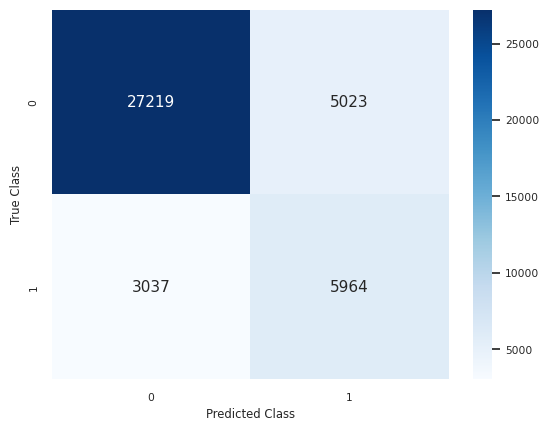

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(dt_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

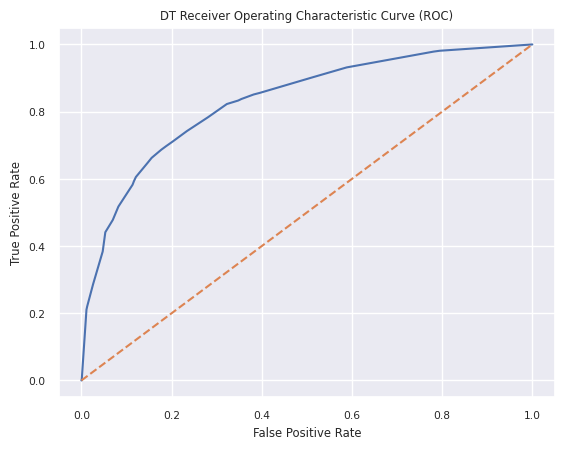

In [ ]:
# Plot the ROC curve
probs = tree_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT Receiver Operating Characteristic Curve (ROC)')
plt.show()

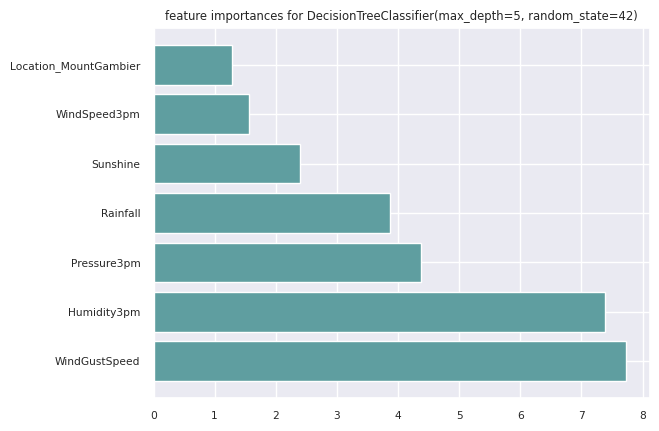

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(tree_model))
    plt.show()

# Specifying top n features to visualize
f_importances(abs(lr.coef_[0]), features_names, top=7)

##AdaBoost

In [ ]:
# Train the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
ab_predictions = adaboost_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
ab_accuracy = adaboost_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
ab_confusion = confusion_matrix(test['RainTomorrow'], ab_predictions)
ab_report = classification_report(test['RainTomorrow'], ab_predictions)
ab_precision = precision_score(test['RainTomorrow'], ab_predictions)
ab_recall = recall_score(test['RainTomorrow'], ab_predictions)
ab_f1_score = f1_score(test['RainTomorrow'], ab_predictions)
ab_roc_auc = roc_auc_score(test['RainTomorrow'], ab_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(ab_accuracy)
print()

print("Confusion Matrix:")
print(ab_confusion)
print()

print("Classification Report:")
print(ab_report)
print()

print("Precision Score:")
print(ab_precision)
print()

print("Recall Score:")
print(ab_recall)
print()

print("F1 Score:")
print(ab_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(ab_roc_auc)
print()

Accuracy:
0.8069490580219674

Confusion Matrix:
[[26878  5364]
 [ 2598  6403]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     32242
         1.0       0.54      0.71      0.62      9001

    accuracy                           0.81     41243
   macro avg       0.73      0.77      0.74     41243
weighted avg       0.83      0.81      0.82     41243


Precision Score:
0.5441488909662616

Recall Score:
0.7113654038440174

F1 Score:
0.6166217257318952

Area Under the ROC Curve (AUC-ROC):
0.7724992765761864



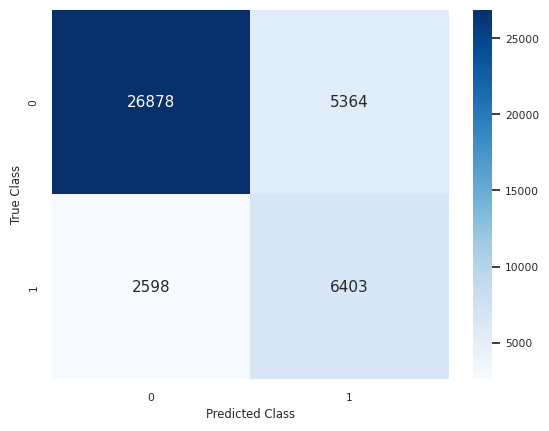

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(ab_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

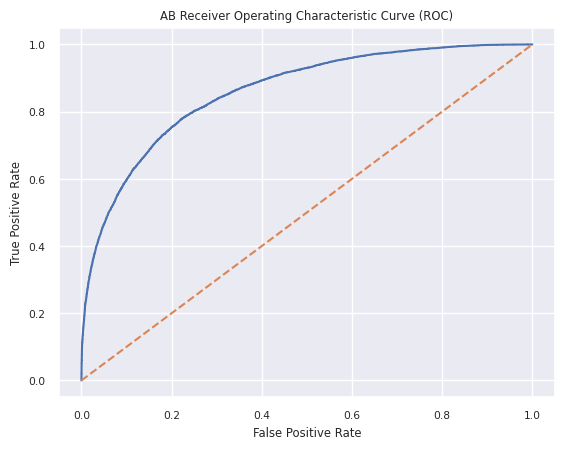

In [ ]:
# Plot the ROC curve
probs = adaboost_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AB Receiver Operating Characteristic Curve (ROC)')
plt.show()

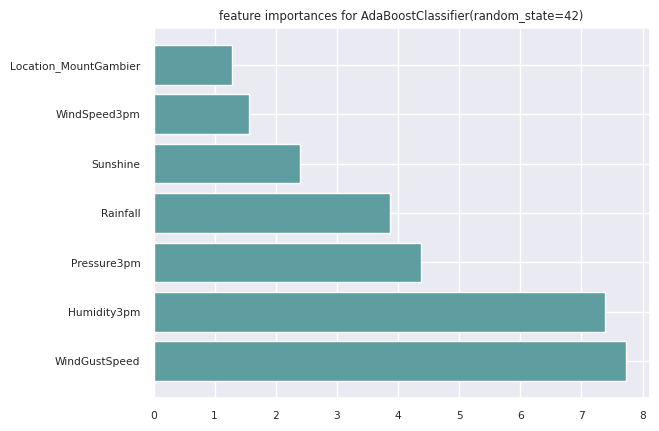

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(adaboost_model))
    plt.show()

# Specifying top n features to visualize
f_importances(abs(lr.coef_[0]), features_names, top=7)

##Bagging Classifier

In [ ]:
# Train the Bagging model
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
bm_predictions = bagging_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
bm_accuracy = bagging_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
bm_confusion = confusion_matrix(test['RainTomorrow'], bm_predictions)
bm_report = classification_report(test['RainTomorrow'], bm_predictions)
bm_precision = precision_score(test['RainTomorrow'], bm_predictions)
bm_recall = recall_score(test['RainTomorrow'], bm_predictions)
bm_f1_score = f1_score(test['RainTomorrow'], bm_predictions)
bm_roc_auc = roc_auc_score(test['RainTomorrow'], bm_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(bm_accuracy)
print()

print("Confusion Matrix:")
print(bm_confusion)
print()

print("Classification Report:")
print(bm_report)
print()

print("Precision Score:")
print(bm_precision)
print()

print("Recall Score:")
print(bm_recall)
print()

print("F1 Score:")
print(bm_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(bm_roc_auc)
print()

Accuracy:
0.8464709162767015

Confusion Matrix:
[[29223  3019]
 [ 3313  5688]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     32242
         1.0       0.65      0.63      0.64      9001

    accuracy                           0.85     41243
   macro avg       0.78      0.77      0.77     41243
weighted avg       0.84      0.85      0.85     41243


Precision Score:
0.6532674859308603

Recall Score:
0.6319297855793801

F1 Score:
0.6424215044047888

Area Under the ROC Curve (AUC-ROC):
0.7691470775176846



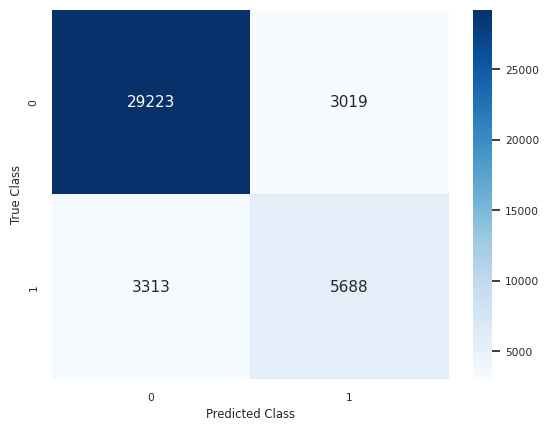

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(bm_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

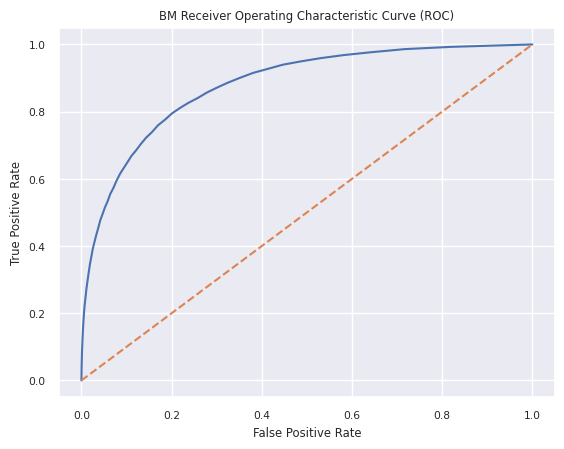

In [ ]:
# Plot the ROC curve
probs = bagging_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BM Receiver Operating Characteristic Curve (ROC)')
plt.show()

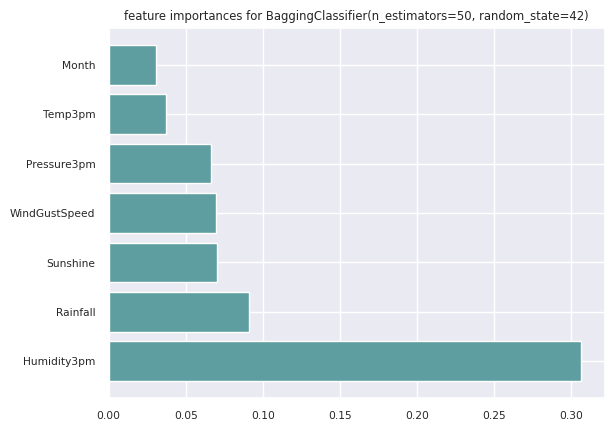

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(bagging_model))
    plt.show()

# Calculate feature importances using mean decrease impurity
importances = bagging_model.estimators_[0].feature_importances_
for estimator in bagging_model.estimators_[1:]:
    importances += estimator.feature_importances_

#Specifying top n features to visualize
f_importances(importances / len(bagging_model.estimators_), test.drop('RainTomorrow', axis=1).columns, top=7)

## Support Vector Machine (SVM)

In [ ]:
# Train the SVM model
svm_model = LinearSVC(loss='hinge')
svm_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

LinearSVC(loss='hinge')

In [ ]:
# Make predictions on the test data
svm_predictions = svm_model.decision_function(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
svm_accuracy = svm_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
svm_confusion = confusion_matrix(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))
svm_report = classification_report(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))
svm_precision = precision_score(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))
svm_recall = recall_score(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))
svm_f1_score = f1_score(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))
svm_roc_auc = roc_auc_score(test['RainTomorrow'], np.where(svm_predictions>0.5, 1,0))

In [ ]:
# Print performance metrics
print("Accuracy:")
print(svm_accuracy)
print()

print("Confusion Matrix:")
print(svm_confusion)
print()

print("Classification Report:")
print(svm_report)
print()

print("Precision Score:")
print(svm_precision)
print()

print("Recall Score:")
print(svm_recall)
print()

print("F1 Score:")
print(svm_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(svm_roc_auc)
print()

Accuracy:
0.798487015978469

Confusion Matrix:
[[28701  3541]
 [ 3123  5878]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     32242
         1.0       0.62      0.65      0.64      9001

    accuracy                           0.84     41243
   macro avg       0.76      0.77      0.77     41243
weighted avg       0.84      0.84      0.84     41243


Precision Score:
0.6240577556003822

Recall Score:
0.6530385512720809

F1 Score:
0.6382193268186753

Area Under the ROC Curve (AUC-ROC):
0.7716064290384349



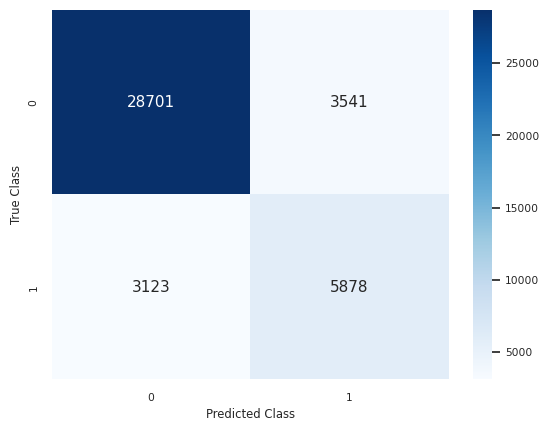

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(svm_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

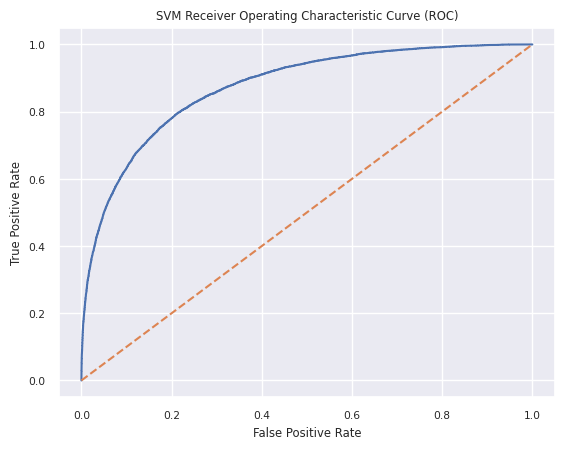

In [ ]:
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], svm_predictions)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic Curve (ROC)')
plt.show()

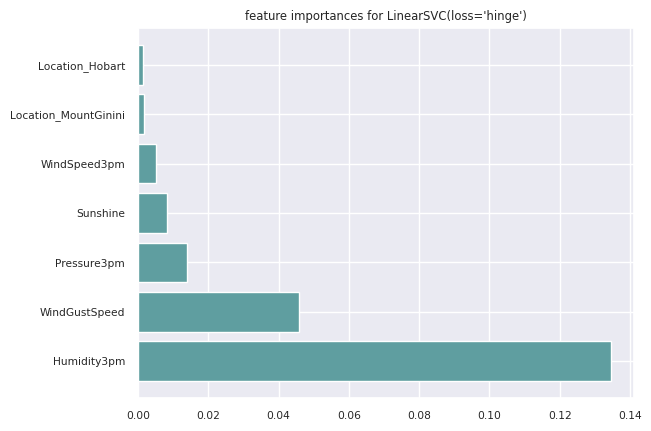

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(importances, names, top=-1):
    indices = np.argsort(importances)[::-1]
    
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), importances[indices][:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), np.array(names)[indices][:top])
    plt.title('feature importances for {}'.format(svm_model))
    plt.show()

# Calculate feature importances using permutation importance
result = permutation_importance(svm_model, test.drop('RainTomorrow', axis=1), test['RainTomorrow'], n_repeats=10, random_state=42)

# Plot the feature importances
f_importances(result.importances_mean, test.drop('RainTomorrow', axis=1).columns, top=7)

## Random Forest

In [ ]:
# Train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
rf_predictions = rf_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
rf_accuracy = accuracy_score(test['RainTomorrow'], rf_predictions)
rf_confusion = confusion_matrix(test['RainTomorrow'], rf_predictions)
rf_report = classification_report(test['RainTomorrow'], rf_predictions)
rf_precision = precision_score(test['RainTomorrow'], rf_predictions)
rf_recall = recall_score(test['RainTomorrow'], rf_predictions)
rf_f1_score = f1_score(test['RainTomorrow'], rf_predictions)
rf_roc_auc = roc_auc_score(test['RainTomorrow'], rf_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(rf_accuracy)
print()

print("Confusion Matrix:")
print(rf_confusion)
print()

print("Classification Report:")
print(rf_report)
print()

print("Precision Score:")
print(rf_precision)
print()

print("Recall Score:")
print(rf_recall)
print()

print("F1 Score:")
print(rf_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(rf_roc_auc)
print()

Accuracy:
0.8520476202022161

Confusion Matrix:
[[29314  2928]
 [ 3174  5827]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     32242
         1.0       0.67      0.65      0.66      9001

    accuracy                           0.85     41243
   macro avg       0.78      0.78      0.78     41243
weighted avg       0.85      0.85      0.85     41243


Precision Score:
0.6655625356938892

Recall Score:
0.6473725141650928

F1 Score:
0.656341518359991

Area Under the ROC Curve (AUC-ROC):
0.7782796445895248



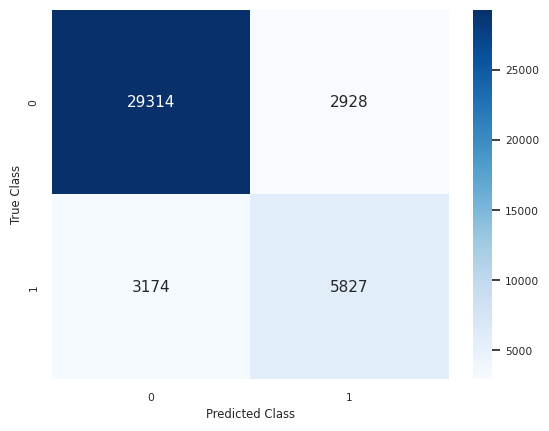

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(rf_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

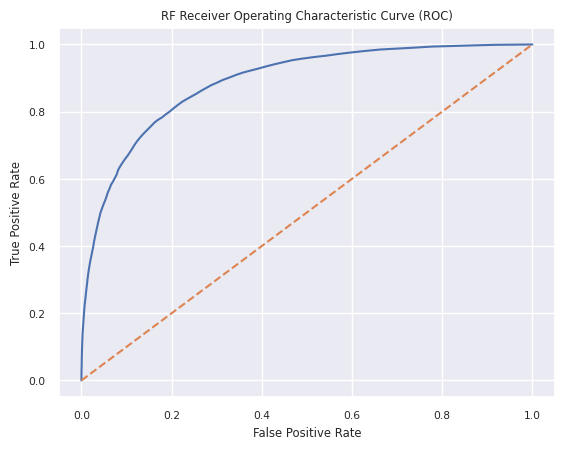

In [ ]:
# Plot the ROC curve
probs = rf_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Receiver Operating Characteristic Curve (ROC)')
plt.show()

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(rf_model))
    plt.show()

# Specifying top n features to visualize
f_importances(abs(lr.coef_[0]), features_names, top=7)

## Multilayer Perceptron

In [ ]:
# Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
mlp_model.fit(train.drop('RainTomorrow', axis=1), train['RainTomorrow'])

# Make predictions on the test data
mlp_predictions = mlp_model.predict(test.drop('RainTomorrow', axis=1))

# Calculate performance metrics
mlp_accuracy = mlp_model.score(test.drop('RainTomorrow', axis=1), test['RainTomorrow'])
mlp_confusion = confusion_matrix(test['RainTomorrow'], mlp_predictions)
mlp_report = classification_report(test['RainTomorrow'], mlp_predictions)
mlp_precision = precision_score(test['RainTomorrow'], mlp_predictions)
mlp_recall = recall_score(test['RainTomorrow'], mlp_predictions)
mlp_f1_score = f1_score(test['RainTomorrow'], mlp_predictions)
mlp_roc_auc = roc_auc_score(test['RainTomorrow'], mlp_predictions)

In [ ]:
# Print performance metrics
print("Accuracy:")
print(mlp_accuracy)
print()

print("Confusion Matrix:")
print(mlp_confusion)
print()

print("Classification Report:")
print(mlp_report)
print()

print("Precision Score:")
print(mlp_precision)
print()

print("Recall Score:")
print(mlp_recall)
print()

print("F1 Score:")
print(mlp_f1_score)
print()

print("Area Under the ROC Curve (AUC-ROC):")
print(mlp_roc_auc)
print()

Accuracy:
0.8203089009043959

Confusion Matrix:
[[27382  4860]
 [ 2551  6450]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88     32242
         1.0       0.57      0.72      0.64      9001

    accuracy                           0.82     41243
   macro avg       0.74      0.78      0.76     41243
weighted avg       0.84      0.82      0.83     41243


Precision Score:
0.5702917771883289

Recall Score:
0.7165870458837907

F1 Score:
0.6351238245285807

Area Under the ROC Curve (AUC-ROC):
0.7829259899104457



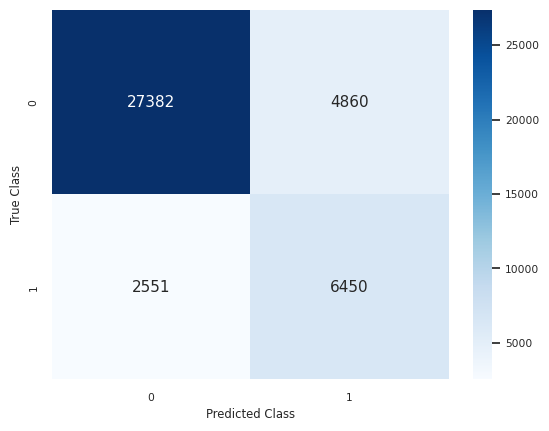

In [ ]:
# Plot the confusion matrix
sns.set(font_scale=0.7)
sns.heatmap(mlp_confusion, annot=True, annot_kws={"size": 11}, fmt='.0f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
# Plot the ROC curve
probs = mlp_model.predict_proba(test.drop('RainTomorrow', axis=1))
fpr, tpr, thresholds = roc_curve(test['RainTomorrow'], probs[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic Curve (ROC)')
plt.show()

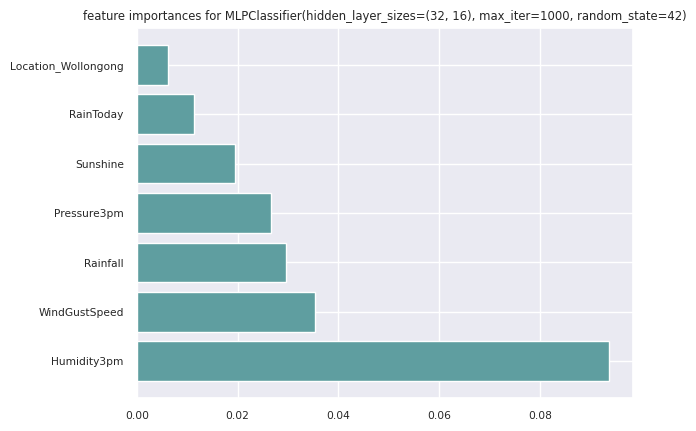

In [ ]:
# Calling features_names
features_names = rainfall_data.columns

# Defining features
def f_importances(importances, names, top=-1):
    indices = np.argsort(importances)[::-1]
    
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), importances[indices][:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), np.array(names)[indices][:top])
    plt.title('feature importances for {}'.format(mlp_model))
    plt.show()

# Calculate feature importances using permutation importance
result = permutation_importance(mlp_model, test.drop('RainTomorrow', axis=1), test['RainTomorrow'], n_repeats=10, random_state=42)

# Plot the feature importances
f_importances(result.importances_mean, test.drop('RainTomorrow', axis=1).columns, top=7)

## Efficiency Table

In [ ]:
model_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'K-Nearest-Neighbors', 'Decision Tree', 'AdaBoost', 'Bagging Classifier', 'SVM' , 'Random Forest', 'Multilayer Perceptron'],

    'Accuracy'    : [lr_accuracy, knn_accuracy, dt_accuracy, ab_accuracy, bm_accuracy, svm_accuracy, rf_accuracy, mlp_accuracy],
    'Precision'   : [lr_precision, knn_precision, dt_precision, ab_precision, bm_precision, svm_precision, rf_precision, mlp_precision],
    'Recall'      : [lr_recall, knn_recall, dt_recall, ab_recall, bm_recall, svm_recall, rf_recall, mlp_recall ],
    'F1_Score'    : [lr_f1_score, knn_f1_score, dt_f1_score, ab_f1_score, bm_f1_score, svm_f1_score ,rf_f1_score, mlp_f1_score],
    'AUC_ROC'     : [lr_roc_auc, knn_roc_auc, dt_roc_auc, ab_roc_auc, bm_roc_auc, svm_roc_auc, rf_roc_auc, mlp_roc_auc  ],
    }, columns = ['Model' , 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC',])

#model_initial.sort_values(by='AUC_ROC', ascending=False,inplace=True);
model_initial.to_csv('Models comparison default.csv',index=False)

pd.read_csv('Models comparison default.csv',)

Model  Accuracy  Precision    Recall  F1_Score   AUC_ROC
0    Logistic Regression  0.799020   0.527052  0.770581  0.625965  0.788770
1    K-Nearest-Neighbors  0.685134   0.370810  0.635374  0.468310  0.667200
2          Decision Tree  0.804573   0.542823  0.662593  0.596758  0.753401
3               AdaBoost  0.806949   0.544149  0.711365  0.616622  0.772499
4     Bagging Classifier  0.846471   0.653267  0.631930  0.642422  0.769147
5                    SVM  0.798487   0.624058  0.653039  0.638219  0.771606
6          Random Forest  0.852048   0.665563  0.647373  0.656342  0.778280
7  Multilayer Perceptron  0.820309   0.570292  0.716587  0.635124  0.782926

In [ ]:
col_names = ["Model", "Accuracy", "Precision","Recall","F1_score","AUC_ROC_score"]
print(tabulate(model_initial,headers=col_names,tablefmt="fancy_grid"))

╒════╤═══════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │ Model                 │   Accuracy │   Precision │   Recall │   F1_score │   AUC_ROC_score │
╞════╪═══════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │ Logistic Regression   │   0.79902  │    0.527052 │ 0.770581 │   0.625965 │        0.78877  │
├────┼───────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │ K-Nearest-Neighbors   │   0.685134 │    0.37081  │ 0.635374 │   0.46831  │        0.6672   │
├────┼───────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │ Decision Tree         │   0.804573 │    0.542823 │ 0.662593 │   0.596758 │        0.753401 │
├────┼───────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │ AdaBoost              │   0.806949 │    0.544149 │ 0.711365 │   0.616622 │        0.772499 │


In [ ]:
new_input = {'Date': '2017-06-19',
             'Location': 'Sydney',
             'MinTemp': 11.2,
             'MaxTemp': 18.3,
             'Rainfall': 0.4,
             'Evaporation': 2.2,
             'Sunshine': 1.9,
             'WindGustDir': 'SSW',
             'WindGustSpeed': 37.0,
             'WindDir9am': 'W',
             'WindDir3pm': 'S',
             'WindSpeed9am': 17.0,
             'WindSpeed3pm': 19.0,
             'Humidity9am': 79.0,
             'Humidity3pm': 69.0,
             'Pressure9am': 1030.4,
             'Pressure3pm': 1028.4,
             'Cloud9am': 6.0,
             'Cloud3pm': 7.0,
             'Temp9am': 12.7,
             'Temp3pm': 17.2,
             'RainToday': 'No',
             'RainTomorrow': 'Yes'}

## Analysis

### Features

Humidity3PM and WindGustSpeed are consistently among the most important features for each model, thus indicating that these two features are particularly relevant to determining whether or not it will rain tomorrow. 


### Models





Out of all eight models, Random Forest has the highest accuracy of 0.850835, kNN while has the lowest at 0.68465. At first glance, this may indicate that Random Forest is the best model. However, accuracy may not be the best indicator of performance for a heavily imbalanced dataset such as Rain in Australia. 

As a result, we should also look towards the precision and recall of our models as an indicator of performance. Precision measures the proportion of true positive predictions among all positive predictions made by the model, and Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. In the context of Rain in Australia, precision measures the proportion of correct predictions saying it will rain tomorrow out of all predictions saying it will rain tomorrow. Recall measures the proportion of correct predictions saying it will rain tomorrow out of all observations where it does rain tomorrow. 

The model with the highest precision is Random Forest with 0.662521, and the model with the lowest precision is kNN with 0.370548. 

The model with the highest recall is Logistic Regression with 0.770803, and the model with the lowest recall is Bagging Classifier with 0.629152. 

In the case of our dataset, we would give substantially more importance to recall over both accuracy and precision due to the high cost of a false negative. If a model were to predict that it wouldn't rain the next day when it actually would, then this could results in millions of dollars of damages if a city fails to prepare for the rain. 

AUC-ROC score is also an important metric, it indicates a model's ability to distinguish between positive and negative instances which is critical due to the high cost of a false negative. Logistic Regression has the highest AUC-ROC score with 0.789114, and kNN has the lowest score with 0.66741.

Based on these evaluation metrics and their importance in the context of our project, Logistic Regression would be the best machine learning model to predict the value of Rain Tomorrow. 